# **Welcome to Discord Bot Development with Python!**
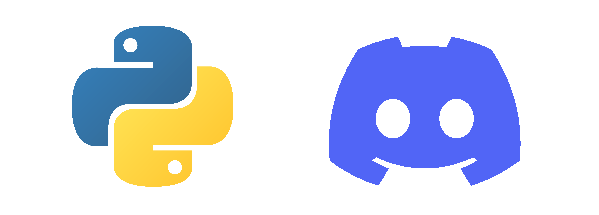

#Course Overview 
---

This is a standalone Python workshop taught on the Google Colab platform. Attending the CEAS Library's Introduction to Python workshops and experience with Python or any other programming language is strongly recommended. This workshop goes over the creation of bots for Discord, a popular text messaging platform, for task automation, server management, and miscellaneous fun applications. Both a Google account and Discord account are required for this workshop.


\\


In this workshop, you will learn:


*   How Discord bots are made
*   What Discord bots are used for
*   Creating and utalizing enviroment variables (.env)
*   An overview of async. functions and their use in Python
*   Foundational knowledge of the pycord API wrapper

#Important Links
[pycord Documentation](https://docs.pycord.dev/en/master/)

[Discord Developer Portal](https://discord.com/developers/applications)



#Pre-requisites
---

*   Please ensure that you have a Discord account.
*   It is highly recommended to create a test server for your bot.
  * To do this, click the + "Add a Server" button at the bottom of the server list on the Discord client and select "Create My Own".
  * You can skip the community question when prompted, set a name for the server, and click **Create**.
* You should already have a good-ish understanding of the basics of Python$-$below is a list of things that you might want to know before this workshop. If any of these ideas seem foreign to you, don't worry$-$you can still follow along, and if you wish to learn more about what you're actually programming, you should consider taking the CEAS Library's Introduction to Python workshop series.
  * String manipulation 
  * Data types 
  * Basic conditional statements
  * Importing Python packages




#What and Why?
---
Discord is a popular instant-messaging and voice communicatoin service released in 2015. Since then, the developers of Discord have created the Discord Development Portal to allow programmers to create Bot Users, essentially, accounts that have the appearance of a regular user that can run programmed commands on request.

\\

**Why do communities use Discord Bots?**

1.   To organize community events
2.   To handle moderation and role assignment for new users
3.   To utalize the powerful API to connect Discord to other services
4.   To create games, fun activities, and reward systems for members



# Getting Started
---
To begin, start by signing into your Discord account on the [Discord Developer Portal](https://discord.com/developers/applications) page. Next to your profile picture in the top right-hand corner, you will see a New Application button$-$go ahead and click it. 


![](https://i.imgur.com/ValUoQV.png)

Give your application a name on the pop-up and click the **Create** button. You will be taken to the application overview page.


![](https://i.imgur.com/OXgYdbo.png)



Click on the "Bot" tab under settings, and select "Add Bot". If you've successfully created a bot, the window should now look like this:


![](https://i.imgur.com/jRuRk8H.png)


Click on the OAuth2 tab under settings. In that category, continue to the "URL Generator" option. Under "Scopes", check the box that says "bot". When the Bot Permissions tab appears, choose the boxes that say "Send Messages", "Manage Messages", and "Read Message History. Then, copy the generated URL and navigate to it in your browser **in a new tab**. Invite the bot to your test server.


![](https://i.imgur.com/WwAQw1C.png)


Navigate back to the "Bot" tab under settings and click the "Reset Token" button. **This is your bot's secret token$-$do not share it with anyone!** Copy the string of characters that is given and continue to the next section.


![](https://i.imgur.com/7vqOV30.png)


# Creating Enviroment Variables (.env)
---
**Define** enviroment variables: .env files are simple text-based files that allow you to control constant variables for use in your application. This is especially helpful for creating secret variables (think about what would happen if you commited a file with a secret bot key to GitHub!)

Python has a package that allows us to store important secret variables in our personal Google Drive so we can use them for later. In this code block, we import the `colab_env` package, give it permissions to our Drive, and set our DISCORD_TOKEN which we talked about previously.

This helps keep our bot's private key secure$-$this means that only *we* will be able to log into the bot interface and run explicitly our code. 

In [ ]:
!pip install colab-env -qU
import colab_env

Run the code below and paste your Discord bot's token in the field.

\\

-----> ***Only run once, ever.***  <-----

\\

Since the .env is stored in your Google Drive, it persists through Google Colab runtimes. Once you've run this once, if you get disconnected from Google Colab, you can just re-iport `colab-env` using the code block above and then skip straight to Loading Enviroment Variables (.env).

In [ ]:
%reset -f
from colab_env import envvar_handler
from getpass import getpass

envvar_handler.add_env("DISCORD_TOKEN", getpass("DISCORD_TOKEN: "), True)
print(f"Saved enviroment variable to {envvar_handler.envpath}")

#Loading Enviroment Variables (.env)
---
To access the enviroment variable we just set, we import the operating system package for Python `import os` to give it access to our "file system" (in this case, our Google Drive), and then use the `.getenv()` method to assign our token secret to a variable named DISCORD_TOKEN.

In [ ]:
import os
from colab_env import envvar_handler

envvar_handler.envload()
DISCORD_TOKEN = os.getenv("DISCORD_TOKEN")

# Overview of Asynchronous Functions
---

**Define** asynchronous functions: special functions that define code to be executed on seperate *threads*, allowing for several task executions to happen indpendently from the *main function*.

**Define** threads: a set of instructions to be executed by your computer's CPU.

**Define** control flow: the order in which statement, assignments, and functions are called in a program.

\\

###Here's an example of the control flow of a normal function:
![](https://i.imgur.com/Ggfr9kB.png)

###And here's an example of the control flow of an async function:
![](https://i.imgur.com/OL3KsS8.png)

\\



Using async functions in Python is easy. First, we can import the `asyncio` package in our code. We can use the async and await keywords to establish asynchronous control flow. 

**Keyword async:** designates a Python function as asynchronous--the "other function" in the diagram above

**Keyword await:** essentially, adding this to a call to a function lets Python know that we need to wait for the subroutine action to return a value before continuing along in the main function.

\\

When we talked about async functions, we did not touch upon the downsides$-$they do not work perfectly in Jupiter notebooks, the underlying technology of Google Colab, the platform we are using currently. To overcome the problem of async functions not being able to be nested, we can install the `nest_asyncio` package to sidestep this limitation. We apply it to the notebook below with the method `.apply()`.

\\

Below is a small example of asyncio functions being used in Python, from the [Coroutines and Tasks Python 3.10 documentation](https://docs.python.org/3/library/asyncio-task.html). Please run this block so that nest_asyncio is installed:

In [ ]:
import asyncio
import nest_asyncio as n_asyncio
n_asyncio.apply()

import time

async def say_after(time_delay, string):
    await asyncio.sleep(time_delay)
    print(string)

async def main():
    print(f"started at {time.strftime('%X')}")

    await say_after(1, 'hello')
    await say_after(2, 'world')

    print(f"finished at {time.strftime('%X')}")

asyncio.run(main())

# Installing pycord
---
pycord is a very popular library choice for developers of Discord bots. This is because out of every library or language that has implemented the Discord Developer API, the pycord team has worked hard to maintain compatibility, documentation, and ease of use of the features present in the Discord API with Python. We can install it from the pip package `py-cord`, and we'll import it by calling `import discord`.

In [ ]:
!pip install py-cord -qU
import discord

# Instantiating and Running our Bot
---

Below is the code that allows our discord.py bot to come to life. As a limitation of async functions and the nature of Google Colab, all code must be executed in this cell below, and running this cell will prevent you from running other cells. To make changes to this bot, please stop the cell, make your changes, and re-run.

In [ ]:
# Assign the client variable to the result of discord.Client().
client = discord.Client()

# Define an async function under the client event parameter.
# This function will print the bot user's client ID to our console
# once the async function has returned that we have logged in sucessfully.
@client.event
async def on_ready():
    print('We have logged in as {0.user}'.format(client))

# This is the main processing function of the bot. It defines 
# the "on_message" async function--this function will execute
# when a user types a message in the Discord chat.
@client.event
async def on_message(message):
    # Bonus points: does anyone know why we include this line?
    if message.author == client.user:
        return

    # If the content of the chat message starts with the character '!',
    # we know that the chat message was meant to be a command request.
    if message.content.startswith('!'):
        # The command we want to execute is whatever the message is, minus the 
        # "activation character" of '!'.
        command = message.content[1:]

        # Using the if elif else structure, we can check the command the user
        # inputted and return certain messages or functions.

        # ping -- returns message "Pong!" to check the bot's online status.
        if command == "ping":
          await message.channel.send('Pong!')
        # hello - will return the string "Hello, user!" depending on user.
        elif command == "hello":
          None # code for Exercise #1
          



        # help -- will direct message the user a help message.
        elif command == "help":
          None # code for Exercise #2




        # If the command doesnt exist, make the bot state it doens't understand.
        else: 
          await message.channel.send("I'm sorry—not sure that I understand.")
    
    # code for Exercise #3 (challenge)





# This line assigns our client with the correct bot token, authenticating
# that we have access to run our code on this bot user.
client.run(DISCORD_TOKEN)

# Exercise #1
---
**Writing the "hello" command:** create the code for a command that, when executed by a user, will make the bot return a message saying "Hello, user!" where user is the username/id of the user who requested the command. It should be a simple, one line command.

\\

### **Please write your code in the bot-code block above so that you can run it for testing.**

\\

Hint #1: check out the `ping` command on our bot to see the syntax for sending bot messages.

Hint #2: The `message` parameter that is passed from the function when we get a chat message might contain some useful information for this problem, like the author of the message. It might be helpful to [check the documentation.](https://docs.pycord.dev/en/master/api.html?highlight=member#discord.Message.author)



# Exercise #2
---

Writing the "help" command: create the code for a command that, when executed by a user, will make the bot direct message the user once per command with the name of the command for all available commands. 

\\

### **Please write your code in the bot-code block above so that you can run it for testing.**

\\

**Hint #1:** We now know how to get the author of a message. But we do *not* know how to send a direct message, only one to the channel that the command was sent from using `message.channel.send`. Taking a look [at the documentation](https://docs.pycord.dev/en/master/api.html?highlight=member#member) for the method functions of Member might help.

**Hint #2:** We can create a list of available commands by declaring them in a list `["ping","help"...]`.

# Exercise #3 (challenge)
---

We can make bots do all kinds of interesting things. Let's make our bot react to every message that contains the string "Good bot" or "good bot" with the heart emoji (💖).

\\

### **Please write your code in the bot-code block above so that you can run it for testing.**

\\

**Hint #1:** Here is the [documentation page](https://docs.pycord.dev/en/master/api.html?highlight=member#discord.Message.add_reaction) for adding reactions to messages.


**Hint #2:** pycord and Python both support Unicode characters in code. You should try using `'💖'` as a string literal in your answer.

# Additional Information 
---

You've now completed the Discord Bot Development with Python workshop. Thank you for attending! For those of you who want to **develop and maintain a full bot**, I suggest following the steps below to get **3 free months of hosting**, as long as you're a university student.

\\

*   Log into your GitHub account
*   Register with the [GitHub Student Developer Pack](https://education.github.com/pack).
  * This provides free subscriptions to many popular development services as long as you're a student.
* Navigate to the [replit Student Hacker Plan](https://replit.com/site/github-students) page and sign in using your GitHub account.
  * replit is a well established online IDE that allows you to run code with many different languages.
  * We can use replit to host our Discord bot permanently for 3 months (the length of the replit Hacker Plan for Students).
* Develop your bot on the replit editor using the code you've learned in this workshop, run it, and check the "Always On" option in the details of the file (click the name).

\\


Written by [Jack Margeson](marg.es/) for the University of Cincinnati's CEAS Library workshop program.

